# Cluster Analysis in R

### Course Description
Cluster analysis is a powerful toolkit in the data science workbench. It is used to find groups of observations (clusters) that share similar characteristics. These similarities can inform all kinds of business decisions; for example, in marketing, it is used to identify distinct groups of customers for which advertisements can be tailored. In this course, you will learn about two commonly used clustering methods - hierarchical clustering and k-means clustering. You won't just learn how to use these methods, you'll build a strong intuition for how they work and how to interpret their results. You'll develop this intuition by exploring three different datasets: soccer player positions, wholesale customer spending data, and longitudinal occupational wage data.

### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 

https://www.tablesgenerator.com/markdown_tables

### Note 3 - DataFrames

In [1]:
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)
library(datasets)
library(openintro)


#to plot two graphs at sime time 
library(gridExtra)
# grid.arrange(p1, p2, nrow=1)


#Soccer player positions
lineup<-readRDS("D:/Analista Pricing/6.0 Personal/R/DataSources/lineup.rds")

# Occupational Employment Statistics (OES)
oes<-readRDS("D:/Analista Pricing/6.0 Personal/R/DataSources/oes.rds")

# Wholesale customer spending
customers_spend<-readRDS("D:/Analista Pricing/6.0 Personal/R/DataSources/ws_customers.rds")


Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'readr' was built under R version 3.5.3"Warning message:
"package 'openintro' was built under R version 3.5.2"Please visit openintro.org for free statistics materials

Attaching package: 'openintro'

The following object is masked from 'package:ggplot2':

    diamonds

The following objects are masked from 'package:datasets':

    cars, trees

Warning message:
"package 'gridExtra' was built under R version 3.5.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



## 1) Calculating distance between observations
Cluster analysis seeks(search) to find groups of observations that are similar to one another, but the identified groups are different from each other. This similarity/difference is captured by the metric called distance. In this chapter, you will learn how to calculate the distance between observations for both continuous and categorical features. You will also develop an intuition for how the scales of your features can affect distance.

### 1.1) (video) What is cluster analysis?
cluster analysis is form of data exploration and the key to harnessing its power lies in understand how it works, so in this course you won´t just learn the tools necessary to perform cluster analysis, that is the easu part, we 'll work with you to build  the intuation behind the underlying methods but before we get to the how let's take a momoment to disscus what is clustering?

we are working with a bunch of information, this data usually is represented as a matrix with rows (observation) and columns (that tell us something that we measured across these observation ) and we'll refer to these columns as the `features`  of our observations.

In cluster analysis, we are interested in gruping our observation such all members of a grup are are similar to one another and at the same time they are distinctly different from all members outside of this group or put it another way, cluster analysis is a form of exploratory data anlysis (EDA) where observation are divide into meaningful group that share common characteristics amongset each other.

so what is the flow of cluster analysis.

- first your data does not have any missing values and that your features are on similar scales.
- select similarity measure
- cluster
- analyze


### 1.2) (video) Distance between two observations
let's begin by focusing on the question that is fundamental to all  clustering analyses ...how similar are two observations? or from another perspective how dissimilar are they? you see, most clustering methods measure similarity between observations using a dissimilarity metric.

    Distance = 1 - Similarity

Often referred to as the distance, these two concept are just two sides of the same coin.

if two observation have a large distance and then they are less similar  to one another, likewise if their distance value is small then they are more similar, naturally we should first develop a keen intuition by what is meant by distance 

for example we can use the euclidean distance to calculate this measure, if we have two point each of them have their (x,y) coordanates respectevily  then we can use this formula sqrt((x2-x1)^2+(y2-y1)^2) this is the fundamentai idea to calculate the distance between two point.

In R we can use `distance()` function, onlye need to add a data freme or matrix and the method that provides the distance is `method = euclidean`, this function becomes indespensable if we have more that 2 observations. 

note that we use this function with more two observation it coul be expensive 

Example:

In [29]:
two_players<-data.frame(X = c(0,9), Y= c(0,12), row.names = c ("BLUE","RED"))
two_players

#distance
print("Distance between two observations")
dist(two_players, method = "euclidean")


print("Now we have 3 observation")
three_players<-rbind(two_players, 'GREEN' = c(-2, 19))
three_players

print("Distance between three observations")
dist(three_players, method = "euclidean")

,X,Y
BLUE,0,0
RED,9,12


[1] "Distance between two observations"


    BLUE
RED   15

[1] "Now we have 3 observation"


,X,Y
BLUE,0,0
RED,9,12
GREEN,-2,19


[1] "Distance between three observations"


          BLUE      RED
RED   15.00000         
GREEN 19.10497 13.03840

#### 1.2.1)  Calculate & plot the distance between two players
You've obtained the coordinates relative to the center of the field for two players in a soccer match and would like to calculate the distance between them.

In this exercise you will plot the positions of the 2 players and manually calculate the distance between them by using the Euclidean distance formula.

**Exercise**
- Plot their positions from the two_players data frame using ggplot.
- Extract the positions of the players into two data frames player1 and player2.
- Calculate the distance between player1 and player2 by using the Euclidean distance formula sqrt((x1−x2)^2+(y1−y2)^2)

*Answer*

[1] "the distance between two observations"


[1] 11.6619

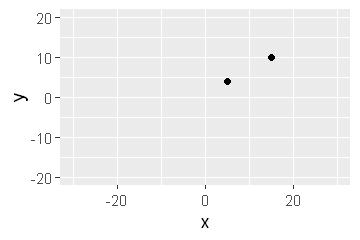

In [44]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=3, repr.plot.height=2)

two_players<-data.frame(x = c(5,15), y= c(4,10))

# Plot the positions of the players
ggplot(two_players, aes(x = x, y = y)) + geom_point() +
  # Assuming a 40x60 field
  lims(x = c(-30,30), y = c(-20, 20))

# Split the players data frame into two observations
player1 <- two_players[1, ]
player2 <- two_players[2, ]

# Calculate and print their distance using the Euclidean Distance formula
player_distance <- sqrt( (player1$x - player2$x)^2 + (player1$y - player2$y)^2 )

print("the distance between two observations")
player_distance

#### 1.2.2)  Using the dist() function
Using the Euclidean formula manually may be practical for 2 observations but can get more complicated rather quickly when measuring the distance between many observations.

The `dist()` function simplifies this process by calculating distances between our observations (rows) using their features (columns). In this case the observations are the player positions and the dimensions are their x and y coordinates.

*Note: The default distance calculation for the dist() function is Euclidean distance*

**Exercise**
- Calculate the distance between two players using the dist() function for the data frame two_players
- Calculate the distance between three players for the data frame three_players

*Answer*

In [45]:
two_players<-data.frame(x = c(5,15), y= c(4,10))
three_players<-data.frame(x = c(5,15,0), y= c(4,10,20))

# Calculate the Distance Between two_players
dist_two_players <- dist(two_players)
dist_two_players

# Calculate the Distance Between three_players
dist_three_players <- dist(three_players)
dist_three_players

        1
2 11.6619

         1        2
2 11.66190         
3 16.76305 18.02776

### 1.3) (video) The importance of scale
when calculating the distance between two players on a soccer field you used two feature (x,y) both of these are the coordinates of the player and both are measured in same manner because of this, they are comparable to one another and can be used togother to calculate euclidean distance between the players, but what happens when the features are not mesured in the same manner or to put it another way, when the values of theese features are not comparable to one another,to answer this question let's walk through an example:

suppose that we provide a large data set that contain the heights and the weights for a large number of men in USA.

| Observation | height(feet) | weight (lbs) |
|-------------|--------------|--------------|
| 1           | 6            | 200          |
| 2           | 6            | 202          |
| 3           | 8            | 200          |
| n           | x            | y            |

- the height feature is mesured in feet
- the weight feature is mesured in pounds

So you are interesting in calculate the distance between these individuals:
    
    dist(1,2) = sqrt( (6-6)^2 + (200-202)^2) = sqrt(0+4)=2 //2 pounds
    dist(1,3) = sqrt( (6-8)^2 + (200-202)^2) = sqrt(4+0)=2 //2 feet
    
the distance between both pairs are identical, if we saw these men standing side by side, would you really believe that observation one is just as similar to three as it is to two... of course not so why are their distance tha same, this happens because the features are on different scales meaning the have different averages and different expected variability.

So how can we adjust these features to calculate a distance that better alignts with our expectations? to do this we need to convert our features to be on a similar scale with one anotherm, there are varios methos to do this, but in this course we will use the metho called `standardization`  z = (x - mean(x)) / sd(x).

in R we can use the `scale()` function to standardize our features.  

In [48]:
height_weight<- data.frame(Height = c(6,6,8), Weight = c(200,202,200))
#the discante
dist(height_weight)

#standardize
scale(height_weight)

         1        2
2 2.000000         
3 2.000000 2.828427

Height,Weight
-0.5773503,-0.5773503
-0.5773503,1.1547005
1.1547005,-0.5773503


#### 1.3.1)  Effects of scale
You have learned that when a variable is on a larger scale than other variables in your data it may disproportionately influence the resulting distance calculated between your observations. Lets see this in action by observing a sample of data from the `trees` data set.

You will leverage the `scale()` function which by default centers & scales our column features.

Our variables are the following:

- Girth - tree diameter in inches
- Height - tree height in inches

**Exercise**
- Calculate the distance matrix for the data frame `three_trees` and store it as dist_trees
- Create a new variable `scaled_three_trees` where the three_trees data is centered & scaled
- Calculate and print the distance matrix for `scaled_three_trees` and store this as `dist_scaled_trees`
- Output both `dist_trees` and `dist_scaled_trees` matrices and observe the change of which observations have the smallest distance between the two matrices (hint: they have changed)

*Answer*

In [51]:
three_trees<-data.frame(Girth = c(8.3,8.6,10.5), Height = c(840,780,864))

# Calculate distance for three_trees 
dist_trees <- dist(three_trees, method = "euclidean")

# Scale three trees & calculate the distance  
scaled_three_trees <- scale(three_trees)
dist_scaled_trees <- dist(scaled_three_trees, method = "euclidean")

# Output the results of both Matrices
print('Without Scaling')
dist_trees

print('With Scaling')
dist_scaled_trees

[1] "Without Scaling"


         1        2
2 60.00075         
3 24.10062 84.02149

[1] "With Scaling"


         1        2
2 1.409365         
3 1.925659 2.511082

### 1.4) (video) Measuring distance for categorical data
So far you have  exclusively worked with one type of distance metric, the euclidean distance,this is a commonly used metric and is a great starting point when working with data that is continuous, but what happens if you the data you have is not continous, but is categorical?

let´s start with the most basic case of categorical features, those are binary.

| wine  | beer | whisky | vodka |
|-------|------|--------|-------|
| TRUE  | TRUE | FALSE  | FALSE |
| FALSE | TRUE | TRUE   | TRUE  |
| ...   | ...  | ...    | ...   |

Here you are presented with survey data, let´s called it survey A, the participents of this survey, were asked whether they enjoy drinking various types of alchohol beverages , since they can only answer yes or no so we can code this binary response as TRUE or FALSE, and we would be interested to learn wich participants are similar to one another based on their responses, to calculate this we will use the similarity score called `Jaccard Index` this measure of similarity captures the ratio between the intersection of "A" and "B" to the union of "A" and "B" o more intuitively the ratio between the number of times  the feutures of both observations  are True to the numbers of times they are ever True 

    J(A,B) = A n B / A u B in our example J(1,2) = 1 n 2 / 1 u 2 = 1 (beer)/ 4 (4 TRUE) = .25

but what about of distance, we remember that distance is `distance = 1 - similarity` so `Distance(1,2) = 1- J(1,2) = .75`

Now, to learn how to do this in R, and in order to calcualte the jaccard distance between all three observation you just need to specify that the distance method to use in the `dist()` function is `binary` e.g

In [55]:
survey_a<-data.frame(wine = c(T,F,T),  beer = c(T,T,F), whiskey = c(F,T,T), vodka = c(F,T,F))
survey_a

dist(survey_a, method = "binary")

wine,beer,whiskey,vodka
TRUE,TRUE,FALSE,FALSE
FALSE,TRUE,TRUE,TRUE
TRUE,FALSE,TRUE,FALSE


          1         2
2 0.7500000          
3 0.6666667 0.7500000

Now let´s expand this idea to a broader case of categorical data where we have feautes represented by more two categories, for survey b, we have gathered the favorite color and sport for our participants, for color their choices were red,blue and green and for sport decision was between soccer or hockey,to calculate the distance we need to represent the presence or absence of each category in a procces known as `dummification` , essentialy we consider each feature-value pair and encoded its presence or absence as a 1 or 0 (True and False) 

| color | sport  |
|-------|--------|
| red   | soccer |
| green | hockey |
| blue  | hockey |
| blue  | soccer |
| ...   | ...    |

Once our data is dummified, its just a matter or calculating the Jaccard distance between the observations

| colorblue | colorgreen | colorred | sportsoccer | sporthockey |
|-----------|------------|----------|-------------|-------------|
| 0         | 0          | 1        | 1           | 0           |
| 0         | 1          | 0        | 0           | 1           |
| 1         | 0          | 0        | 0           | 1           |
| 1         | 0          | 0        | 1           | 0           |

to perform this preliminary step in R, we would use the `dummy` data frame function from the `dummy` library after that we can leverage this to calculate the distance for our data, e.g

In [58]:
survey_b<- data.frame(color = c("red","green","blue","blue"), sport = c("soccer","hockey","hockey","soccer"))
survey_b

library(dummies)
dummy_survey_b<-dummy.data.frame(survey_b)

dummy_survey_b

dist(dummy_survey_b, method = "binary")

color,sport
red,soccer
green,hockey
blue,hockey
blue,soccer


colorblue,colorgreen,colorred,sporthockey,sportsoccer
0,0,1,0,1
0,1,0,1,0
1,0,0,1,0
1,0,0,0,1


          1         2         3
2 1.0000000                    
3 1.0000000 0.6666667          
4 0.6666667 1.0000000 0.6666667

#### 1.4.1)Calculating distance between categorical variables
In this exercise you will explore how to calculate `binary (Jaccard) distances`. In order to calculate distances we will first have to dummify our categories using the `dummy.data.frame()` from the library `dummies`

You will use a small collection of survey observations stored in the data frame `job_survey` with the following columns:

- job_satisfaction Possible options: "Hi", "Mid", "Low"
- is_happy Possible options: "Yes", "No"

**Exercise**
- Create a dummified data frame dummy_survey
- Generate a Jaccard distance matrix for the dummified survey data dist_survey using the dist() function using the parameter method = 'binary'
- Print the original data and the distance matrix

Note the observations with a distance of 0 in the original data (1, 2, and 4)

*Answer*

In [3]:
job_survey<- data.frame(job_satisfaction = c("Low","Low","Hi","Low","Mid"), is_happy = c("No","No","Yes","No","No"))
library(dummies)

# Dummify the Survey Data
dummy_survey <- dummy.data.frame(job_survey)

# Calculate the Distance
dist_survey <- dist(dummy_survey, method = "binary")

# Print the Original Data
job_survey

# Print the Distance Matrix
dist_survey

job_satisfaction,is_happy
Low,No
Low,No
Hi,Yes
Low,No
Mid,No


          1         2         3         4
2 0.0000000                              
3 1.0000000 1.0000000                    
4 0.0000000 0.0000000 1.0000000          
5 0.6666667 0.6666667 1.0000000 0.6666667

## 2) Hierarchical clustering
This chapter will help you answer the last question from chapter 1 - how do you find groups of similar observations (clusters) in your data using the distances that you have calculated? You will learn about the fundamental principles of hierarchical clustering - the linkage criteria and the dendrogram plot - and how both are used to build clusters. You will also explore data from a wholesale distributor in order to perform market segmentation of clients using their spending habits.


### 2.1) (video)  Comparing more than two observations
You were presented with a distance matrix that contained the euclidean distance between 4 soccer players

| - | 1    | 2    | 3    |
|---|------|------|------|
| 2 | 11.7 | -    | -    |
| 3 | 16.8 | 18.0 | -    |
| 4 | 10.0 | 20.6 | 15.8 |

You know that the closest two players are one and four (with a distance of 10.0), in order to cluster more than two observations together, you need to determine which of these distance are true:

- is observation 2 closest to the newly formed group (1,4) or
- is 3 is closer to group (1,4)

To answer this question you must decided on how to measure the distance from group (1,4) to these observations, one approach we can take is to measure the maximum distance of each observation to the two members of the group.

To calculate this agregated distance between observation 2 and group (1,4) we would get take the large of the two distances from 2 to 1 and 2 to 4 i.e `max(D(2,1),D(2,4)) = 20.6` and hence is our maximum distance we can apply the same logic when we comparing observation 3 `max(D(3,1),D(3,4)) = 16.8` using this approach we can say that based on the maximum distance, observation 3 is closer to  group (1,4).

Hierarchical Cluster is just a continuation of this approach, this clustering method, iteratively groups the observations based on their pairwise distance until every observation is linked into one large group and the decision of who select the closest observation to an existing group is called `linking criteria`:

In our example we decided that observation 3 was the closest based on the maximium distance between it and group 1-4, the aproach we used is formally called the complete `linkage criteria`. let's see the hierarchical clustering method in action using a visual representation:

1. the distances between the four players have already been calculated and are shown, we know that players 1 and 4 have the shortest distance and will be grouped first 
2. we are now presented with 3 options: add player 2  to group 1-4, add player 3 to group 1-4 or start a new group for players 2 and 3, the desicion will be made based on which option results in the smallest distance:

    - we saw the distance between 2 and 3 is 18.0
    - to calcualte the distance between players 2 and group 1-4 we will use the `complete linkage` method, which is the maximum of the distances between observation two and each member of group 1-4 and applying the same  result for player 3 and each member of group 1-4, of 3 option the grouping of player 3 with 1-4 is selected because it has the smallest distance value so grouped it with group 1-4.
    
3. the next round of grouping doesn´t require any decision making, we simply aggregate observation two with group 1-3-4

Inline-style: 
![](./Imagenes/linkage_criteria.jpg)

Now you have an iterative binary grouping of your 4 observations. The order in wich these observations are grouped generates hierarchy based on distance, and hance is called `hierarchical clustering`, there are many different linkage methods that have been developed:

- **Complete Linkage**: maximum distance between two sets.
- **Single Linkage**: minium distance between two sets
- **Average Linkage**: average distance between two sets

#### 2.1.1) Calculating linkage
Let us revisit the example with `three players` on a field. The distance matrix between these three players is shown below and is available as the variable `dist_players`.

From this we can tell that the first group that forms is between players 1 & 2, since they are the closest to one another with a Euclidean distance value of 11.

Now you want to apply the three linkage methods you have learned to determine what the distance of this group is to player 3.

In [16]:
three_players<-data.frame(x = c(5,15,0), y= c(4,10,20))
dist_players<-dist(three_players, method = "euclidean")
dist_players


         1        2
2 11.66190         
3 16.76305 18.02776

**Exercise**
Calculate the distance from player 3 to the group of players 1 & 2 using the following three linkage methods.

- Complete: the resulting distance is based on the maximum.
- Single: the resulting distance is based on the minimum.
- Average: the resulting distance is based on the average.

*Answer*

In [18]:
# Extract the pair distances
distance_1_2 <- dist_players[1]
distance_1_3 <- dist_players[2]
distance_2_3 <- dist_players[3]

# Calculate the complete distance between group 1-2 and 3
complete <- max(c(distance_1_3, distance_2_3))
complete

# Calculate the single distance between group 1-2 and 3
single <- min(c(distance_1_3, distance_2_3))
single

# Calculate the average distance between group 1-2 and 3
average <- mean(c(distance_1_3, distance_2_3))
average

[1] 18.02776

[1] 16.76305

[1] 17.39541

#### 2.1.2) Revisited: The closest observation to a pair
You are now ready to answer this question!

Below you see a pre-calculated distance matrix between four players on a soccer field. You can clearly see that players 1 & 4 are the closest to one another with a Euclidean distance value of 10. This distance matrix is available for your exploration as the variable `dist_players`

**Exercise**
- If 1 and 4 are the closest players among the four, which player is closest to players 1 and 4?

*Answer*

Complete Linkage: Player 3,
Single & Average Linkage: Player 2

In [32]:
four_players<-data.frame(x = c(5,15,0,-5), y= c(4,10,20,5))
dist_players<-dist(four_players, method = "euclidean")
dist_players

distance_1_2 <-dist_players[1]
distance_1_3 <-dist_players[2]
distance_1_4 <-dist_players[3]
distance_2_3 <-dist_players[4]
distance_2_4 <-dist_players[5]
distance_3_4 <-dist_players[6]


#Complete 
#Para el jugador 2 calculemos su max vs el grupo 1 y 4
max(distance_1_2 ,distance_2_4)

#Para el jugador 3 calculemos su max vs el grupo 1 y 4
max(distance_1_3 ,distance_3_4)

# teniendo los resultados anterior podemos calcular dado el mini cual es el mas cercano
print("Complete Linkage,El minimo entre las dos distancias agrupadas es el jugador 3")


#signle 
#Para el jugador 2 calculemos su min vs el grupo 1 y 4
min(distance_1_2 ,distance_2_4)

#Para el jugador 3 calculemos su min vs el grupo 1 y 4
min(distance_1_3 ,distance_3_4)

# teniendo los resultados anterior podemos calcular dado el mini cual es el mas cercano
print("Single Linkage,El minimo entre las dos distancias agrupadas es el jugador 2")


#average 
#Para el jugador 2 calculemos su mean vs el grupo 1 y 4
mean(distance_1_2 ,distance_2_4)

#Para el jugador 3 calculemos su mean vs el grupo 1 y 4
mean(distance_1_3 ,distance_3_4)

# teniendo los resultados anterior podemos calcular dado el mini cual es el mas cercano
print("Average Linkage,El minimo entre las dos distancias agrupadas es el jugador 2")

         1        2        3
2 11.66190                  
3 16.76305 18.02776         
4 10.04988 20.61553 15.81139

[1] 20.61553

[1] 16.76305

[1] "Complete Linkage,El minimo entre las dos distancias agrupadas es el jugador 3"


[1] 11.6619

[1] 15.81139

[1] "Single Linkage,El minimo entre las dos distancias agrupadas es el jugador 2"


[1] 11.6619

[1] 16.76305

[1] "Average Linkage,El minimo entre las dos distancias agrupadas es el jugador 2"


### 2.2) (video) Capturing K clusters
In the last few exercises you explored the ways in which it's posibles to group multiple observations together using `linkage analysis` now you already to leverage this technique to group your observations into a predifine number of clusters, so let´s revisit the soccer example with a few more players

In this case you have the position of six players at the start of a game and you would like to infer wich player belong wich team using `hierarchical clustering` , a eucleadan distance matrix was calculated for each pair of players and is now used to group players using a `Complete Linkage criteria` .

This algorithm iteratively proceeds to group the players until they are all under a single like so.

Once it´s completed we can backward to capture desired number of clusters, at this moment there is just  one cluster if we remove the last gruping like so we have two different cluster, the red cluster contains  players 5-6  while the blue cluster has player from 1 to 4.

Just like peeling an onion we can further split this into more parts by removing the previous `linking grouping`. 

In this case it was group 1,2  and 4  linked to player 3. And now we have 3 distinct cluster red,blue and green so, the process of indentifying a pre-define number of cluster, we will refer to as `k` is as simple as undoing the last k-1 steps of `Linkage grouping` .

Inline-style: 
![](./Imagenes/Capturing_K_clusters.jpg)

Now we'll see this en R.

[1] 1 1 1 1 2 2
    x  y cluster
1  -1  1       1
2  -2 -3       1
3   8  6       1
4   7 -8       1
5 -12  8       2
6 -15  0       2


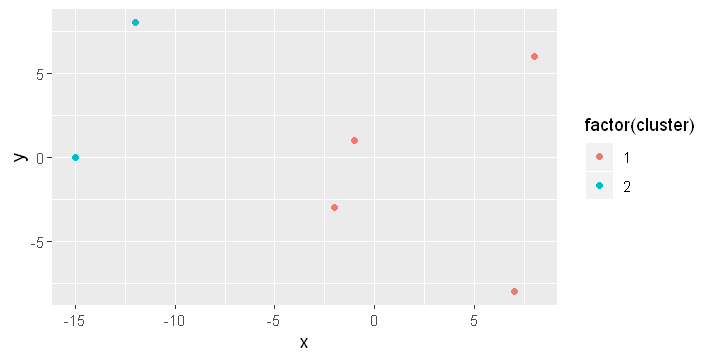

In [3]:
players<-data.frame(x = c(-1,-2,8,7,-12,-15), y= c(1,-3,6,-8,8,0))
dist_players<-dist(players, method = "euclidean")

# to perform the linkage steps will use hclus function which accepts a distance matrix and linkage method
hc_players<-hclust(dist_players, method = "complete")

# in order to determine which observations belong to which cluster, we use the cutree function
# in this case we want to have two clusters because we know that there two teams
cluster_assignments<-cutree(hc_players, k = 2)

#the output of cutree is a vector which represents which cluster each observation belongs to 
print(cluster_assignments)


#now we can append this back to our original df to do further analysis with the now clustered observations
library(dplyr)
players_clustered<-mutate(players, cluster = cluster_assignments)
print(players_clustered)

# and finally one way we can analyze the clustering result is to plot the positions of these players and color 
# the points based on their cluster assignment
library(ggplot2)

library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=3)

ggplot(players_clustered, aes(x =x, y = y, color = factor(cluster))) + geom_point()

#### 2.2.1) Assign cluster membership
In this exercise you will leverage the `hclust()` function to calculate the iterative linkage steps and you will use the `cutree()` function to extract the cluster assignments for the desired number (`k`) of clusters.

You are given the positions of 12 players at the start of a 6v6 soccer match. This is stored in the `lineup` data frame.

You know that this match has two teams `(k = 2)`, let's use the clustering methods you learned to assign which team each player belongs in based on their position.

Notes:

- The linkage method can be passed via the method parameter: `hclust(distance_matrix, method = "complete")`
- Remember that in soccer opposing teams start on their half of the field.
- Because these positions are measured using the same scale we do not need to re-scale our data.

**Exercise**
- Calculate the Euclidean distance matrix dist_players among all twelve players
- Perform the **complete** linkage calculation for hierarchical clustering using `hclust` and store this as `hc_players`
- Build the cluster assignment vector `clusters_k2` using `cutree(`) with a `k = 2`
- Append the cluster assignments as a column `cluster` to the `lineu`p data frame and save the results to a new data frame called `lineup_k2_complete`

*Answer*

In [6]:
#lineup # we need load our d.frames

# Calculate the Distance
dist_players <- dist(lineup, method = "euclidean")

# Perform the hierarchical clustering using the complete linkage
hc_players <- hclust(dist_players, method = "complete")

# Calculate the assignment vector with a k of 2
clusters_k2 <- cutree(hc_players, k = 2)

# Create a new data frame storing these results
lineup_k2_complete <- mutate(lineup, cluster = clusters_k2)

#### 2.2.2) Exploring the clusters
Because clustering analysis is always in part qualitative, it is incredibly important to have the necessary tools to explore the results of the clustering.

In this exercise you will explore that data frame you created in the previous exercise `lineup_k2_complete`.

Reminder: The `lineup_k2_complete` data frame contains the x & y positions of 12 players at the start of a 6v6 soccer game to which you have added clustering assignments based on the following parameters:

- Distance: *Euclidean*
- Number of Clusters (k): *2*
- Linkage Method: *Complete*

**Exercise**
- Using count() from dplyr, count the number of players assigned to each cluster.
- Using ggplot(), plot the positions of the players and color them by cluster assignment.

*Answer*

cluster,n
1,6
2,6


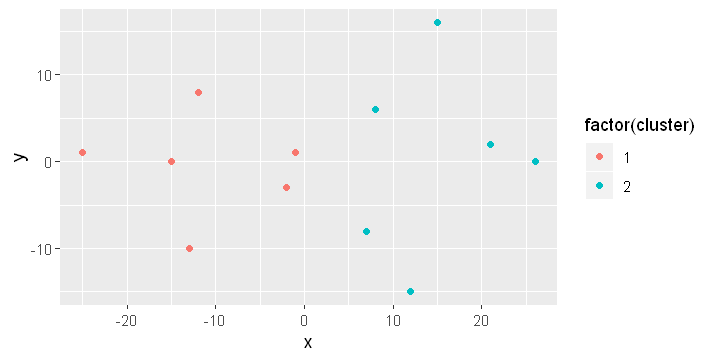

In [15]:
# Count the cluster assignments
count(lineup_k2_complete, cluster)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_k2_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

### 2.3) (video) Visualizing the Dendrogram
As you recently learned, the process of hierarchical clustering involves iteratively grouping observations via pairwise comparisons until all observations are gather into a single group.We can representet this grouping visually using a plot called the `Dendogram`  also knows as a `Tree Digram` so build a Dendogram let´s start with the same six player soccer lineup from our last video.

On the left we have the positions of the players and on the right we will assemble a Dendogram as we iteratively group these observations, as before we can start the process of hierarchical clustering by taking the 2 closest observation (1 and 2) and gruping them, correspondingly we can represent this grouping in the tree diagram, the dendogram encodes a very important attribute of our grouping, the distance between the observations that were grouped, this is captered by the height axis, as before we will form the next closets group (5 and 6) , by comparing the pairwaise distances and linkage criteria-based distnace among observation and existing groups, the first group (1 and 2) forms now a new group with 4 and is according represented in the dendogram, the common branch between these 3 observations again encodes distance more specifilly it's a function of linkage criteria-based distance among all 3 observations, this is an importante feature of the dendogram, it allows us to say something very concrete about our grouped observations at any given height, remember that for distance we chose euclidean distance and linkage criteria used was the complete method, so we can continue until finshed to agrupe all our observations.

To visualize a dendogram in R, we need to do is plot the corresponding `hclus` object 

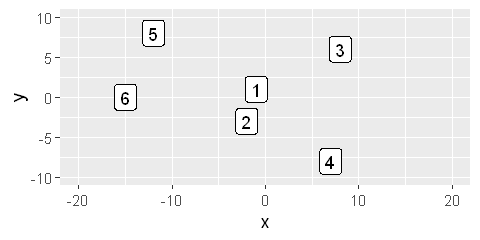

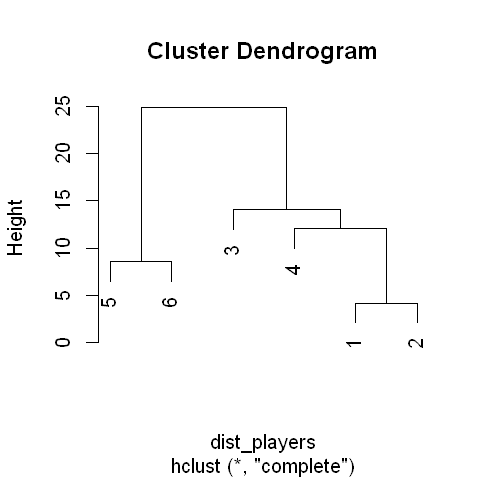

In [50]:
players<-data.frame(x = c(-1,-2,8,7,-12,-15), y= c(1,-3,6,-8,8,0))
dist_players<-dist(players, method = "euclidean")

# to perform the linkage steps will use hclus function which accepts a distance matrix and linkage method
hc_players<-hclust(dist_players, method = "complete")

library(ggplot2)
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=10, repr.plot.height=2)


options(repr.plot.width=4, repr.plot.height=2)
ggplot(players, aes(x =x, y = y)) + geom_text(label = 1:6) + geom_label(label = 1:6) + lims(x = c(-20,20), y = c(-10, 10))


options(repr.plot.width=4, repr.plot.height=4)
plot(hc_players)


#### 2.3.1) Comparing average, single & complete linkage
You are now ready to analyze the clustering results of the lineup dataset using the dendrogram plot. This will give you a new perspective on the effect the decision of the linkage method has on your resulting cluster analysis.

**Exercise**
- Perform the linkage calculation for hierarchical clustering using the linkages: complete, single and average
- Plot the three dendrograms side by side and review the changes

*Answer*

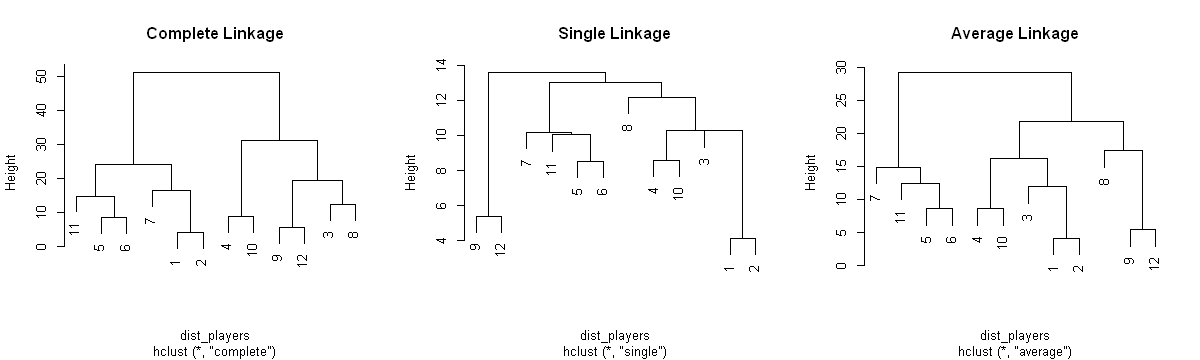

In [48]:
# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=3)

# Prepare the Distance Matrix
dist_players <- dist(lineup)

# Generate hclust for complete, single & average linkage methods
hc_complete <- hclust(dist_players, method = "complete")
hc_single <- hclust(dist_players, method = "single")
hc_average <- hclust(dist_players, method = "average")

# Plot & Label the 3 Dendrograms Side-by-Side
# Hint: To see these Side-by-Side run the 4 lines together as one command
par(mfrow = c(1,3))
plot(hc_complete, main = 'Complete Linkage')
plot(hc_single, main = 'Single Linkage')
plot(hc_average, main = 'Average Linkage')

### 2.3) (video)  Cutting the tree
In the previous exercises you have learned how plot and interpret the Dendrogram now let's learn how to leverage this visualization to both identify our clusters and how highlight some of their key characteristics.

Let´s continue work with the soccer player Dendrogram , remember the distance between the observations was calculated using  euclidean distance and we used the complete linkage criteria, that means that any given branch, all members that share this branch will have a euclidean distance amongst one another no greater than height of that branch.

We can leverage this idea to both select our clusters and also characterize the relationships of their members, to do so, we can cut our tree at any desired height, let´s choose 15 for now, that means we remove all links above this cut point and we create our clusters below in this case two cluster are formed (5-6 and 1,2,4,3) using this cutoff we can alredy ascribe a characteristic to them. 

We can say all members of the created clusters will have a equal euclidean distance amongst each other not greater than our cut height of 15 , this statment is a functions of  our choice of height, distance metric and linkage criteria, this information can be very valuable as our data gets more features and becomes harders to plot using only two dimensions.

We can visualize the cluster that form at any given height by leveraging the `dendextend` library to color our dendogram plot, to do so.

1. we first must convert the `hclust` object into a dendogram object by using the function as (dot) dendrogram
2. the next step is to use the `color_branches` function from `dendextend` package to color the branches based on a desired criteria, in this case we want to cut using a height of 15, we represented this using the parameter `h` 
3. Finally we use the `plot` function to plot the newly colored dendrogram 

We can use this visual to further explore heights at which we may want to create our clusters, let´s say we believed a height of ten would be more appropiete, as shown in this plot with a proposed red line, we perform the steps to color the tree using an `h` equal to 10, the resulting dendrogram now has four colors for the corresponding four clousters.

You can also leverage the `color_braches` to color the tree using `k` criteria by just providing our desired `k` like so our 3 plot.

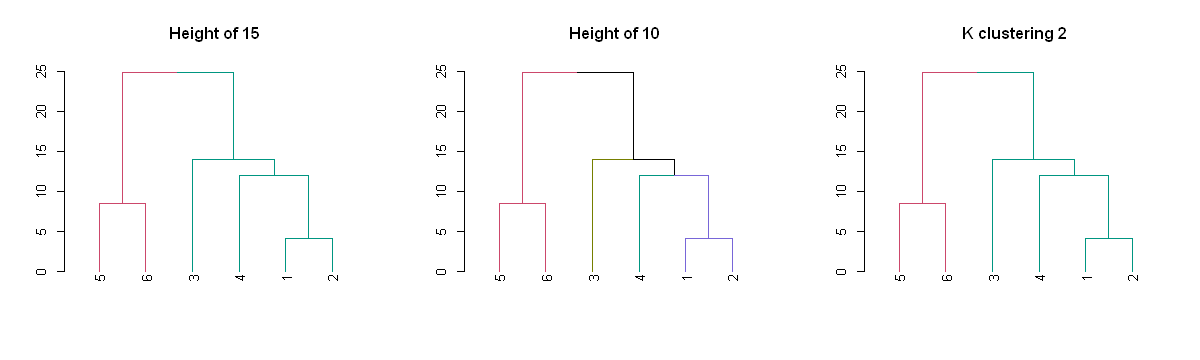

In [8]:
# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=3)

#we need our data sources and our libraries
library(dendextend)
players<-data.frame(x = c(-1,-2,8,7,-12,-15), y= c(1,-3,6,-8,8,0))
dist_players<-dist(players, method = "euclidean")

# to perform the linkage steps will use hclus function which accepts a distance matrix and linkage method
hc_players<-hclust(dist_players, method = "complete")


#1) 
dend_players<-as.dendrogram(hc_players)

#2)
dend_color_15height<-color_branches(dend_players, h = 15)
dend_color_10height<-color_branches(dend_players, h = 10)
dend_color_k<-color_branches(dend_players, k = 2)

#3)
par(mfrow = c(1,3))
plot(dend_color_15height, main = 'Height of 15') 
plot(dend_color_10height, main = 'Height of 10') 
plot(dend_color_k, main = 'K clustering 2') 

just like `color_branches` can interchangeably use `height` or `k,` the `cutree` function we used to first make clusters can be used to assing cluster memberships using a provided `height` with the parameter `h` , and as before, we can append this vector of cluster assignments to our data frame in order to empower us to do further exploration 

In [11]:
# Calculate the assignment vector with a k of 2
clusters_assignments <- cutree(hc_players, h = 15)

clusters_assignments

library(dplyr)
players_clustered<-mutate(players, cluster = clusters_assignments)

players_clustered


[1] 1 1 1 1 2 2

Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



x,y,cluster
-1,1,1
-2,-3,1
8,6,1
7,-8,1
-12,8,2
-15,0,2


#### 2.3.1)  Clusters based on height
In previous exercises you have grouped your observations into clusters using a pre-defined number of clusters **(k)**. In this exercise you will leverage the visual representation of the dendrogram in order to group your observations into clusters using a maximum height **(h)**, below which clusters form.

You will work the `color_branches()` function from the `dendextend` library in order to visually inspect the clusters that form at any height along the dendrogram.

The `hc_players` has been carried over from your previous work with the soccer line-up data.

**Exercise**
- Create a dendrogram object `dend_players` from your `hclust` result using the function `as.dendrogram()`
- Plot the dendrogram
- Using the `color_branches()` function create & plot a new dendrogram with clusters colored by a cut height of 20
- Repeat the above step with a height of 40

*Answer*

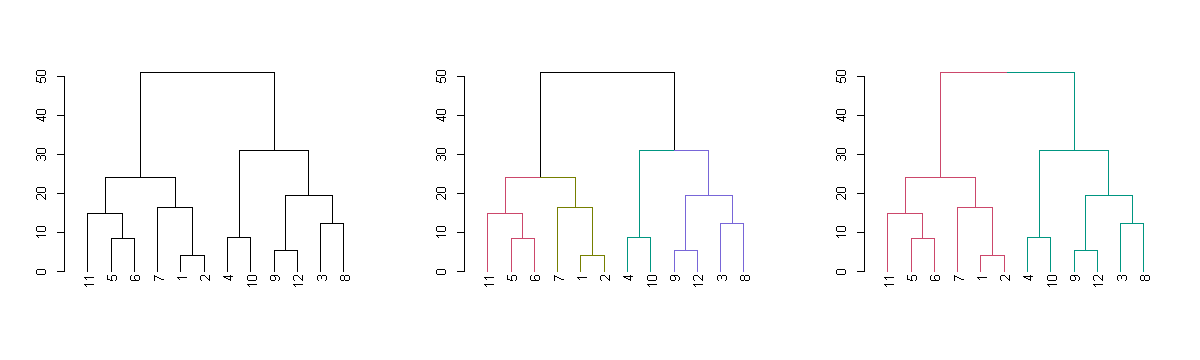

In [14]:
library(dendextend)
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Create a dendrogram object from the hclust variable
dend_players <- as.dendrogram(hc_players)


par(mfrow = c(1,3))
# Plot the dendrogram
plot(dend_players)

# Color branches by cluster formed from the cut at a height of 20 & plot
dend_20 <- color_branches(dend_players, h = 20)

# Plot the dendrogram with clusters colored below height 20
plot(dend_20)

# Color branches by cluster formed from the cut at a height of 40 & plot
dend_40 <- color_branches(dend_players, h = 40)

# Plot the dendrogram with clusters colored below height 40
plot(dend_40)

#### 2.3.2)  Exploring the branches cut from the tree
The `cutree()` function you used in exercises 5 & 6 can also be used to cut a tree at a given height by using the `h` parameter. Take a moment to explore the clusters you have generated from the previous exercises based on the heights 20 & 40.

**Exercise**

- Build the cluster assignment vector `clusters_h20` using `cutree()` with a `h = 20`
- Append the cluster assignments as a column `cluster` to the lineup data frame and save the results to a new data frame called `lineup_h20_complete`
- Repeat the above two steps for a height of 40, generating the variables clusters_h40 and lineup_h40_complete
- Use ggplot2 to create a scatter plot, colored by the cluster assignment for both heights

*Answer*

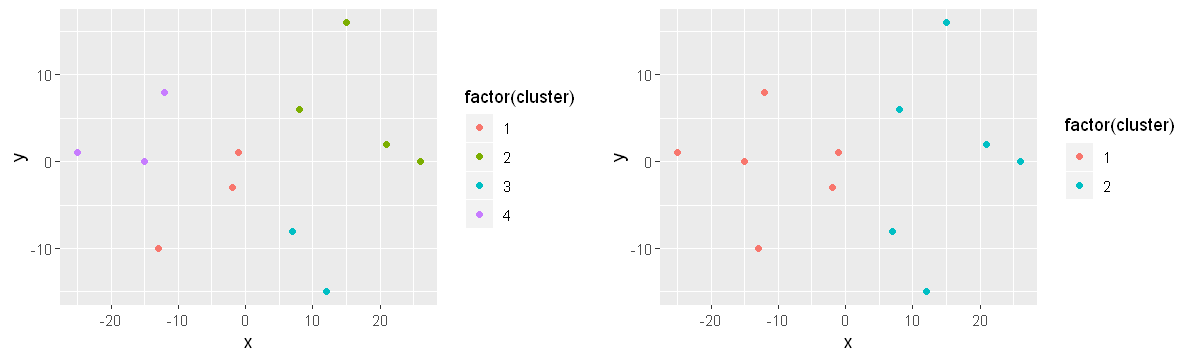

In [20]:
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Calculate the assignment vector with a h of 20
clusters_h20 <- cutree(hc_players, h = 20)

# Create a new data frame storing these results
lineup_h20_complete <- mutate(lineup, cluster = clusters_h20)

# Calculate the assignment vector with a h of 40
clusters_h40 <- cutree(hc_players, h = 40)

# Create a new data frame storing these results
lineup_h40_complete <- mutate(lineup, cluster = clusters_h40)

# Plot the positions of the players and color them using their cluster for height = 20
p1<-ggplot(lineup_h20_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

# Plot the positions of the players and color them using their cluster for height = 40
p2<-ggplot(lineup_h40_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

grid.arrange(p1, p2, nrow=1)


### 2.4) (video) Making sense of the clusters
over the last series of exercises, you've developed the tools that you need to run hierarchical clustering and the intuition to understand the impact of each step. Now you will have a chance to use these skills by clustering a new dataset, you will work with a series of 45 records of customer spendings from wholesale distribuitor, for each customer records you'll have 3 features:

- spending on milk 
- Grocery and 
- Frozen Food Spending

The dataset will look like this `head(customers_spend)` you will notice that unlike the soccer positions dataset, where we onlye have 2 features this dataset has 3, the concequence of this is that, we can´t simply explore what the cluster mean from a two dimensional plot, there are several approaches to overcome this:

- Plot 2 dimensions at a time: once you have assigned the cluster memberships,you can make multiple plots with feature pairs and use the color to show the difference in clusters, this can be helpful, but  only captures one angle of the complex interactions at a time, also this approach can quickly get out  of hand when the numbers of features expands.
- Visualize using PCA: You can use Dimensionality Reduction Methods such as principal component analysis in order to plot multi-dimensional data onto two dimensions and color the points using the cluster assigments, this can be helpful to see if your observations clustered well and the clusters are well seperated, hovewer this type of analysis is difficult to interpret and wouldn't shed light on the characteristics of the cluster 
- Summary statistics by feature: Finally you can simply  explore the distribution characteristics, shuch as the mean and median of each feature within your clusters and by comparing these summary statistics between clusters you can begin to build a narrative of what makes the observations within the cluster similar to each other while different from the observations in the other clusters 

Now we desired outcome is to segment customers based on their behaviors, once the segments are identified we can explore their common characteristics to gain insights into our customers base and design value-drive opportunities using this data.

#### 2.4.1)Segment wholesale customers
You're now ready to use hierarchical clustering to perform market segmentation (i.e. use consumer characteristics to group them into subgroups).

In this exercise you are provided with the amount spent by 45 different clients of a wholesale distributor for the food categories of Milk, Grocery & Frozen. This is stored in the data frame `customers_spend`. Assign these clients into meaningful clusters.

Note: For this exercise you can assume that because the data is all of the same type (amount spent) and you will not need to scale it.

**Exercise**
- Calculate the Euclidean distance between the customers and store this in `dist_customers`
- Run hierarchical clustering using complete linkage and store in `hc_customers`
- Plot the dendrogram
- Create a cluster assignment vector using a height of 15,000 and store it as `clust_customers`
- Generate a new data frame `segment_customers` by appending the `cluster` assignment as the column `cluster` to the original `customers_spend` data frame

*Answer*

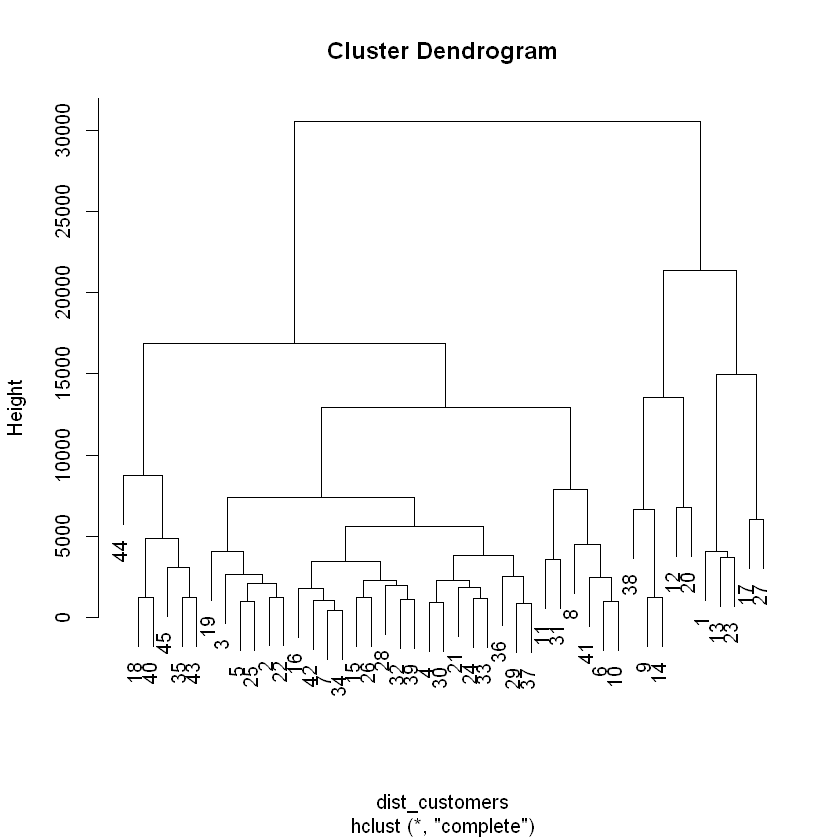

In [10]:
# Calculate Euclidean distance between customers
dist_customers<-dist(customers_spend)

# Generate a complete linkage analysis 
hc_customers<- hclust(dist_customers, method = "complete")

# Plot the dendrogram
plot(hc_customers)

# Create a cluster assignment vector at h = 15000
clust_customers<-cutree(hc_customers, h = 15000)

# Generate the segmented customers data frame
segment_customers <- mutate(customers_spend, cluster = clust_customers)


#### 2.4.2) Explore wholesale customer clusters
Continuing your work on the wholesale dataset you are now ready to analyze the characteristics of these clusters.

Since you are working with more than 2 dimensions it would be challenging to visualize a scatter plot of the clusters, instead you will rely on summary statistics to explore these clusters. In this exercise you will analyze the mean amount spent in each cluster for all three categories.

**Exercise**
- Calculate the size of each cluster using count().
- Color & plot the dendrogram using the height of 15,000.
- Calculate the average spending for each category within each cluster using the summarise_all() function.

(Note: We use the objects from the previous exercises)

*Answer*

cluster,n
1,5
2,29
3,5
4,6


Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session."

cluster,Milk,Grocery,Frozen
1,16950.000,12891.400,991.200
2,2512.828,5228.931,1795.517
3,10452.200,22550.600,1354.800
4,1249.500,3916.833,10888.667


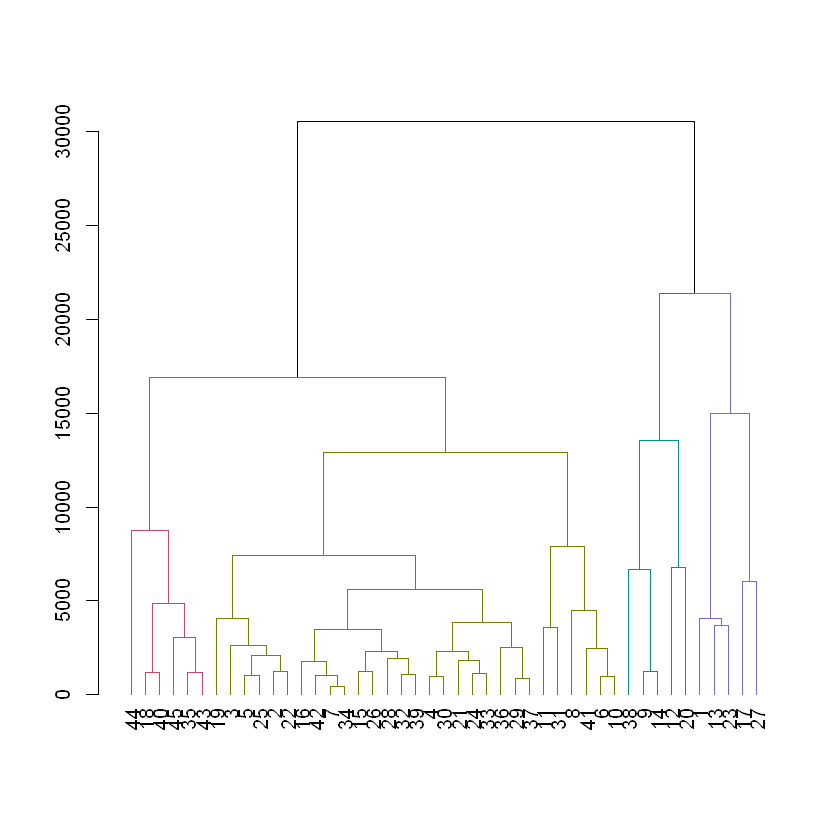

In [17]:
#dist_customers <- dist(customers_spend)
#hc_customers <- hclust(dist_customers)
#clust_customers <- cutree(hc_customers, h = 15000)
#segment_customers <- mutate(customers_spend, cluster = clust_customers)

# Count the number of customers that fall into each cluster
count(segment_customers, cluster)

library(dendextend)
# Color the dendrogram based on the height cutoff
dend_customers <- as.dendrogram(hc_customers)
dend_colored <- color_branches(dend_customers, h = 15000)

# Plot the colored dendrogram
plot(dend_colored)

# Calculate the mean for each category
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(funs(mean(.)))


## 3) K-means clustering
In this chapter, you will build an understanding of the principles behind the k-means algorithm, learn how to select the right k when it isn't previously known, and revisit the wholesale data from a different perspective

### 3.1) (video) Introduction to K-means
In the last chapter you learned how to use the hierarchical clustering 
method to group observations, in this chapter you will learn about another popular method clustering called k-means clustering to learn how this method works, let's revisit an expended version of the soccer lineup data that you have been working with.

This data consists in twelve playes on a soccer  field at the start of the game, at this point in the game the teams are positioned on  opposite sides of the field, we would expect that clustering can be affective in identifying teams and assigning each player to the correct team.

The first step of k-means clustering involves a making a desciscion of how many clusters to generate , this is the 'k' in k-means clustering and this can be decided on in advance based on out understanding the data or it can be estimated from data empirically, in our case we can use k= 2, because we know that in a soccer field only can be two teams.

Once k=2 is stablished the algoritm can proceed, the first step in k-means algorithm is to initialize k-points at random positions in the feature space, we'll refer to these points as the 'clusters centroids' or 'centroids'.

For each observations the distance is calculated betweenthe observation and each centroid, in k-means clustering, the distance is limited euclidean only, the observations now have an initial assignment to one of the two clusters.

The next step involves moving the centroides to the central points of the resulting clusters, again the distance of every observations is calculated to each centroid and they are re-assigned based on which centroid are closest too.

This process continues until the centroids stabilize and the observetaions are no longer re-assigned, this is the fundemental algorithm of k-means clustering 

To generate the kmeans model in R you will use the function with the same name 

In [3]:
#lineup
model<-kmeans(lineup, centers = 2) # k = centers 

#we can extract the cluster assigments directly from the model object
model$cluster


# you can append this vector to your data drame
lineup_clustered<-mutate(lineup, cluster = model$cluster)

head(lineup_clustered, n = 2)

[1] 2 2 1 1 2 2 2 1 1 1 2 1

x,y,cluster
-1,1,2
-2,-3,2


#### 3.1.1) K-means on a soccer field
In the previous chapter you used the lineup dataset to learn about `hierarchical` clustering, in this chapter you will use the same data to learn about `k-means` clustering. As a reminder, the `lineup` data frame contains the positions of 12 players at the start of a 6v6 soccer match.

Just like before, you know that this match has two teams on the field so you can perform a k-means analysis using `k = 2` in order to determine which player belongs to which team.

Note that in the `kmeans(`) function k is specified using the `centers` parameter.

**Exercise**
-Build a k-means model called model_km2 for the lineup data using the kmeans() function with centers = 2
-Extract the vector of cluster assignments from the model model_km2$cluster and store this in the variable clust_km2
-Append the cluster assignments as a column cluster to the lineup data frame and save the results to a new data frame called lineup_km2
-Use ggplot to plot the positions of each player on the field and color them by their cluster

*Answer*

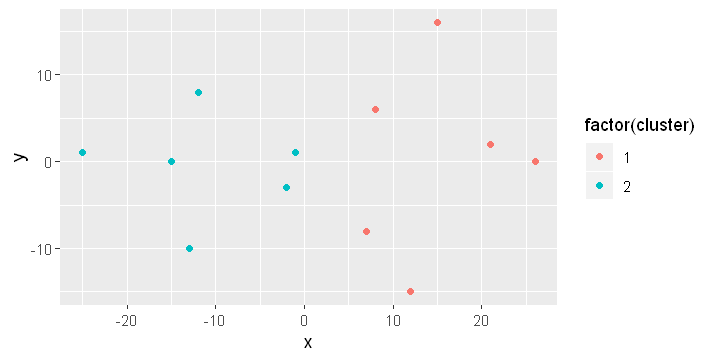

In [12]:
# Build a kmeans model
model_km2<-kmeans(lineup, centers = 2)

# Extract the cluster assignment vector from the kmeans model
clust_km2<-model_km2$cluster

# Create a new data frame appending the cluster assignment
lineup_km2<-mutate(lineup, cluster = clust_km2)

#library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=3)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_km2,aes(x =x, y = y, color = factor(cluster) )) + geom_point()

Note: then next exercise it´s the same that previous but now with k = 3, that is clearly incorrect because we know that only have 2 teams, but it´s a way to see how to choose an incorrect value of our centroide (k=3) can distored our analysis.

### 3.2) (video) Evaluating different values of K by eye
in the last two exercises you explored the results for two different values of k using de same data, you knew that k  of 3 was clearly incorrect because you applied content expertise to this problem by stating that there are only two team in a game of soccer and that the teams have the same number of players, but what happens when you don't know in advance what the right value of k is?

In this course you will learn two methods that addres this challange by estimating k empirically from the data, in this video and the accompaying exercises, you will build an intuition for one of these methods, the elbow method.

The elbow method relies on calculating the total within cluster sum of squeres acrros every cluster, that is the sum of euclidean distances between each observations and the centroide corresponding to the cluster to which the  observations is assigned.

Here, this is represented by the dashed lines between the centroide and each observations (Image 1), while k=1 it is not really clustering, it can be helpul for the elbow analysis , as such we record the total within cluster sum of squeres for the value of k=1 (image 2), we repeat this step for k=2, you can see already see that the dashed lines are on average shorter and we can expect the total within cluster sum of squares to drop (image 3 and 4), which of course it does, same goes for a value of k=3,  and for k = 4 ... we can continue this calculation so long as k is less than our total number of observations, in this case we have calculated this for values of k from 1 through 10, you may notice a trend that as k increases the total within cluster sum of squeres keeps decreasing, this absolutely natural and expected, just think about it, the more you segment your data, the more your points just group together into a smaller and more compact clusters until you obtain many clusters with only one or two members.

What we are looking for is the point at which the curve beings to flatten out, affectionally referred to as the elbow, in these case we can see that there is a precipitous drop going from a k of 1 of 2 and the leveling off when moving between a k of 2 and 3 and onward, as such we can claim that the elbow in this case occurred where k=2 and would consider using this estimated value of k.

Inline-style: 
![](./Imagenes/k_means.jpg)


Now we will buil it in R.

- first you will need to know how to calculate the total within cluster sum of squares (you can extract it from the model)
- after that because you want to calculate this for multiple value of k you will need to create multiple models and extract their corresponding values, to do this I recommend leveraging the map double function from the `purr` library
- finally you can plot it.

[1] 1434.5

k,tot_withinss
1,3489.9167
2,1434.5000
3,881.2500
4,637.2500
5,682.3333
6,291.1667
7,276.6667
8,176.1667
9,82.0000
10,23.0000


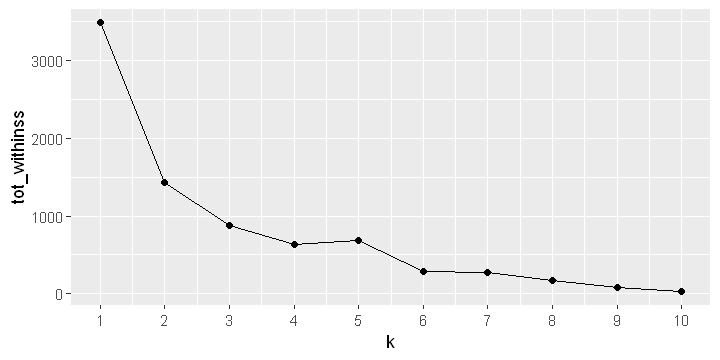

In [3]:
model<-kmeans(x = lineup, centers = 2)
model$tot.withinss

library(purrr)
tot_withinss<-map_dbl(1:10, function(k){
    model<-kmeans(x = lineup, centers = k)
    model$tot.withinss   
})

elbow_df<-data.frame(k= 1:10, tot_withinss=tot_withinss)
elbow_df

options(repr.plot.width=6, repr.plot.height=3)
ggplot(elbow_df, aes(x = k, y= tot_withinss)) + geom_line() + geom_point() + scale_x_continuous(breaks = 1:10)

#### 3.2.1) Many K's many models
While the `lineup` dataset clearly has a known value of k, often times the optimal number of clusters isn't known and must be estimated.

In this exercise you will leverage `map_dbl()` from the `purrr` library to run k-means using values of k ranging from 1 to 10 and extract the total within-cluster sum of squares metric from each one. This will be the first step towards visualizing the elbow plot.

**Exercise**
- Use `map_dbl()` to run `kmeans()` using the `lineup` data for k values ranging from 1 to 10 and extract the total within-cluster sum of squares value from each model: `model$tot.withinss` Store the resulting vector as tot_withinss
- Build a new data frame elbow_df containing the values of k and the vector of total within-cluster sum of squares

*Answer*

In [16]:
library(purrr)

# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = lineup, centers = k)
  model$tot.withinss
})

# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10 ,
  tot_withinss = tot_withinss
)

#### 3.2.2) Elbow (Scree) plot
In the previous exercises you have calculated the total within-cluster sum of squares for values of k ranging from 1 to 10. You can visualize this relationship using a line plot to create what is known as an elbow plot (or scree plot).

When looking at an elbow plot you want to see a sharp decline from one k to another followed by a more gradual decrease in slope. The last value of k before the slope of the plot levels off suggests a "good" value of k.

**Exercise**
- Continuing your work from the previous exercise, use the values in elbow_df to plot a line plot showing the relationship between k and total within-cluster sum of squares

*Answer*

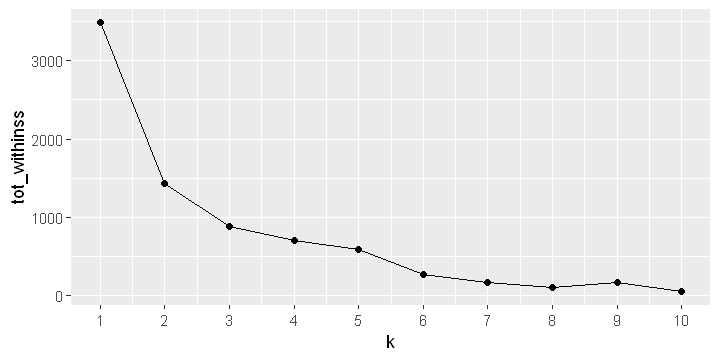

In [21]:
options(repr.plot.width=6, repr.plot.height=3)

# Plot the elbow plot
ggplot(elbow_df, aes(x = k , y = tot_withinss)) +
  geom_line() +
  scale_x_continuous(breaks = 1:10) + geom_point()

### 3.3) (video) Silhouette analysis: Observation level performance

in the last series of exercises you utilized the elbow method to estimate a suitable value of k, in this lesson you'll learn about the Silhouette Analysis method, this approach provides a different lens through which you can understand the result of your cluster analysis,  it can be used to determine how well each of your observations fit into its corresponding cluster and can be leveraged as an additional method for estimating the value of k.

Continuing with our soccer lineup dataset, we will start with the observations already clustered using  kmeans with a k=3, so Silhouette Analysis involves calculating a measurement called the Silhouette  Width for every observation, it consists of two parts.

1. The Within Cluster Distance: C(i)
2. and Closest Neighbor Distance: N(i)

We will work with player number 3 to ilustrate this calculation, the within cluster distance for an observation is the average euclidean distances from that observation to every other observation within the same cluster (Image 1) , in this case the distances are representend by the errors to the others 3 members of the green cluster.

The Closest Neighbor Distance for an observation is the average distance from that observation to the points of the closest neighboring cluster, it´s calculated for the red cluster like so (image 2) the blue cluster (image 3 ), the smallest average distance to out observation is then used as the closest neighbor distance, in this clase the blue cluster is clearly closer, using the values of C(i)  and N(i) the Silhouette width can be calculated as shown here (formula), more importantly is the intuitive interpretation of this value:


Inline-style: 
![](./Imagenes/Silhouette_analysis.jpg)

- a value closer to 1, indicates that this observations is well matched to its current cluster.
- a value of 0, indicated that it´s on the border between two clusters and can possibly belong either one.
- a value of -1 or close to -1, suggests that this observations has a better fit with the neighbor cluster

We can calculated the Silhouette  Width for each observation by leveraging the `pam` function from the `cluster` library (note that pam function is very simliar but it isn't identicall to kmeans ).

The `pam` function requieres a dataframe and a desired numbers of clusters provided by the parameter k, the Silhouette Width can be accessed from the `pam` model object as shown here or they can be visualized using the Silhouette plot like so.

,cluster,neighbor,sil_width
4,1,2,0.465320054
2,1,3,0.321729341
10,1,2,0.311385893
1,1,3,0.271890169
9,2,1,0.443606497
8,2,1,0.398547473
12,2,1,0.393982685
3,2,1,-0.009151755
11,3,1,0.546797052
6,3,1,0.529967901


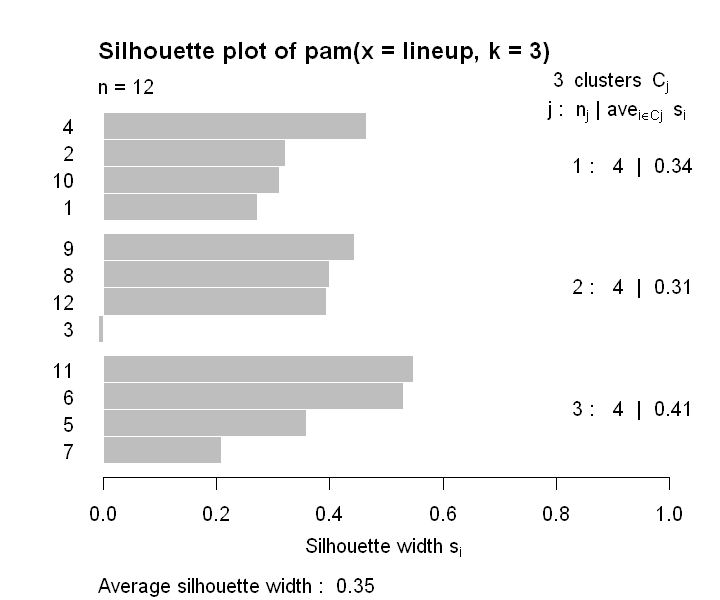

In [30]:
library(cluster)
pam_k3<-pam(lineup, k = 3)

pam_k3$silinfo$widths


options(repr.plot.width=6, repr.plot.height=5)
sil_plot<-silhouette(pam_k3)
plot(sil_plot)

in this plot the bars represented the Silhouette widhts for each obserations,look at observation 3, like we guessed, it´s values is close to zero, also, note at the bottom of this plot the average Silhouette widht across the 12 observations, this measurement can be retrieved from the model object as shown here and it can be interpreted in a manner similar to the Silhouette widht for an observation.

In this case the average is well above zero suggesting that most observations are well matched to their assigned cluster.

In [31]:
pam_k3$silinfo$avg.width

[1] 0.353414

now that you have a way of measuring the effectiveness of the clustering, you can perform an analysis similar to the elbow plot and calculate the average Silhouette width for multiple values of k, the greater the average widht the better the individual observations match to their cluster, similar to the elbow plot we can leverage the map double function to run pam across multiple value of k and recor the average Silhouette widht for each, likewise we can append these mesurements to a dataframe and plot it.

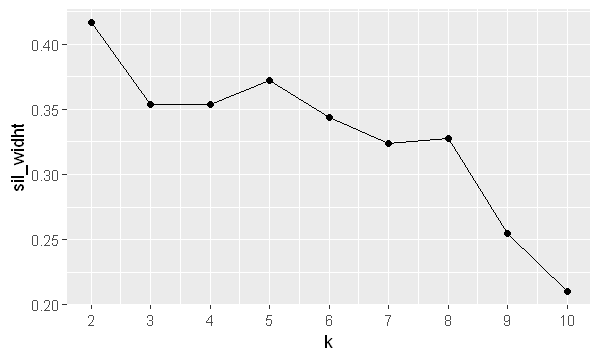

In [5]:
library(purrr)
library(cluster)

# Use map_dbl to run many models with varying value of k (centers)
sil_widht <- map_dbl(2:10,  function(k){
  model <- pam(lineup, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and tot_withinss
sil_df <- data.frame(
  k = 2:10 ,
  tot_withinss = sil_widht
)


options(repr.plot.width=5, repr.plot.height=3)
# Plot 
ggplot(sil_df, aes(x = k , y = sil_widht)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10) + geom_point()


#### 3.3.1) Silhouette analysis
`Silhouette analysis` allows you to calculate how similar each observations is with the cluster it is assigned relative to other clusters. This metric (silhouette width) ranges from `-1` to `1` for each observation in your data and can be interpreted as follows:

    Values close to 1 suggest that the observation is well matched to the assigned cluster
    Values close to 0 suggest that the observation is borderline matched between two clusters
    Values close to -1 suggest that the observations may be assigned to the wrong cluster

In this exercise you will leverage the `pam()` and the `silhouette()` functions from the cluster library to perform silhouette analysis to compare the results of models with a k of 2 and a k of 3. You'll continue working with the lineup dataset.

Pay close attention to the silhouette plot, does each observation clearly belong to its assigned cluster for k = 3?

**Exercise**
- Generate a `k-means` model `pam_k2` using `pam()` with `k = 2` on the lineup data.
- Plot the silhouette analysis using `plot(silhouette(model))`.
- Repeat the first two steps for `k = 3`, saving the model as `pam_k3`.
- Make sure to review the differences between the plots before proceeding (especially observation 3) for pam_k3.

*Answer*

Did you notice that for k = 2, no observation has a silhouette width close to 0? What about the fact that for k = 3, observation 3 is close to 0 and is negative? This suggests that k = 3 is not the right number of clusters

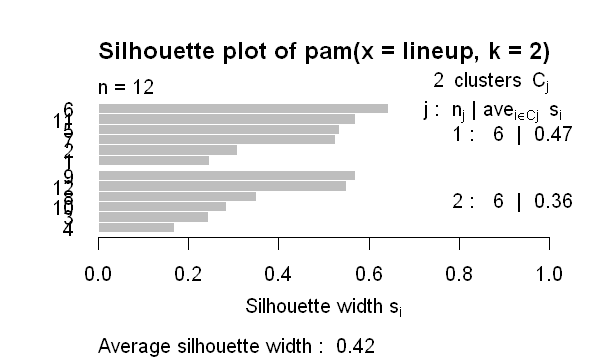

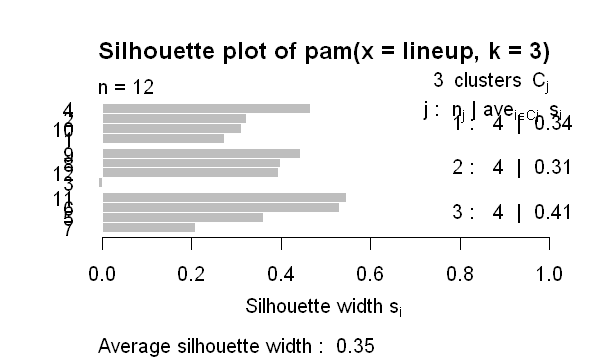

In [10]:
library(cluster)

# Generate a k-means model using the pam() function with a k = 2
pam_k2<-pam(lineup, k = 2)

# Plot the silhouette visual for the pam_k2 model
plot(silhouette(pam_k2))

# Generate a k-means model using the pam() function with a k = 3
pam_k3 <- pam(lineup, k = 3)

# Plot the silhouette visual for the pam_k3 model
plot(silhouette(pam_k3))


### 3.4) (video) Making sense of the K-means clusters
through this chapter you have worked to develop an understanding and an intuition of how to use the k means algorithm and its associated techniques to perform clustering analysis, now it's time to put these tools into practice by revisting the whosale dataset, you have learned a lot since you've last looked at this data, so let´s have a quick reflesher it, the whosale dataset is an exercise in clustering the customer of a whosale distribuidor , this use of clustering is also known as market segmatation, the whosale data consists of 45 observations of client purchases for milk,grocery and frozen food.

at the end of chapter 2, you used herarchical clustering to segment the customers into 4 clusters using a height that seemed appropiete based on the structure of the tree, you then characterized these customers segments by calculating the average of their spending in each category from this analysis you learned that segments 1,3 and 4 consist of around five observations each and their members  collectively spend more on one catergory relative to the others.

in the real worl scenario a finding like this could be used to provide more customized advertising or other targeting for these groups based on their spending habits, do you think the result will be the be the same if you used a different method for clustering?

Let's find out

#### 3.4.1) Revisiting wholesale data: "Best" k
At the end of Chapter 2 you explored wholesale distributor data `customers_spend` using hierarchical clustering. This time you will analyze this data using the `k-means` clustering tools covered in this chapter.

The first step will be to determine the "best" value of k using average `silhouette width`.

A refresher about the data: it contains records of the amount spent by 45 different clients of a wholesale distributor for the food categories of Milk, Grocery & Frozen. This is stored in the data frame `customers_spend`. For this exercise you can assume that because the data is all of the same type (amount spent) and you will not need to scale it.

**Exercise**
- Use `map_dbl()` to run `pam()` using the `customers_spend` data for k values ranging from 2 to 10 and extract the average silhouette width value from each model: `model$silinfo$avg.width` Store the resulting vector as `sil_width`
- Build a new data frame `sil_df` containing the values of k and the vector of average silhouette widths
- Use the values in `sil_df` to plot a line plot showing the relationship between k and average silhouette width

*Answer*

From the plot I hope you noticed that k = 2 has the highest average sillhouette width and is the “best” value of k we will move forward with.

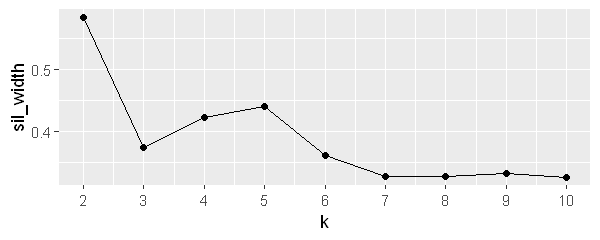

In [23]:
library(purrr)
library(cluster)

library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=5, repr.plot.height=2)

# Use map_dbl to run many models with varying value of k
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(x = customers_spend, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)

# Plot the relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10) + geom_point()

#### 3.4.2)  Revisiting wholesale data: Exploration
From the previous analysis you have found that `k = 2` has the highest average silhouette width. In this exercise you will continue to analyze the wholesale customer data by building and exploring a kmeans model with 2 clusters.

**Exercise**

- Build a k-means model called `model_customers` for the `customers_spend` data using the kmeans() function with centers = 2.
- Extract the vector of cluster assignments from the model `model_customers$cluster` and store this in the variable `clust_customers`.
- Append the cluster assignments as a column cluster to the `customers_spend` data frame and save the results to a new data frame called `segment_customers`.
- Calculate the size of each cluster using count().

*Answer*

In [34]:
set.seed(42)

# Build a k-means model for the customers_spend with a k of 2
model_customers <- kmeans(customers_spend, center = 2)

# Extract the vector of cluster assignments from the model
clust_customers <- model_customers$cluster

# Build the segment_customers data frame
segment_customers <- mutate(customers_spend, cluster = clust_customers)

# Calculate the size of each cluster
count(segment_customers, cluster)


cluster,n
1,35
2,10


Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session."

cluster,Milk,Grocery,Frozen
1,2296.257,5004,3354.343
2,13701.100,17721,1173.000


It seems that in this case cluster 1 consists of individuals who proportionally spend more on Frozen food while cluster 2 customers spent more on Milk and Grocery. Did you notice that when you explored this data using hierarchical clustering, the method resulted in 4 clusters while using k-means got you 2. Both of these results are valid, but which one is appropriate for this would require more subject matter expertise. Before you proceed with the next chapter, remember that: Generating clusters is a science, but interpreting them is an art.

In [35]:
#additional
segment_customers %>% 
group_by(cluster) %>% 
summarise_all(funs(mean(.)))

cluster,Milk,Grocery,Frozen
1,2296.257,5004,3354.343
2,13701.100,17721,1173.000


## 4) Case Study: National Occupational mean wage
In this chapter, you will apply the skills you have learned to explore how the average salary amongst professions have changed over time.

### 4.1 (video) Occupational wage data
there are many type of problems that are suitable for cluster analysis, in the last 3 chapters you encountered two common types of such problems, with the soccer lineup data your worked clustering based  on spatial data, with the whosale speding data you segmented customers into clusters, in this chapter you will encounter a third type of problem, you will leverage the tools you have learned thus far to explore data that changes with the or time series data.

You will work with data that consists of the average incomes for 22 occupations in the united states to collected from 2001 and 2016 this corresponds to a matrix where the observations are the 22 occupations and the features of these observations are the measurements of the average income for each year.

This matrix is stored in the dataframe called `oes`, we can see the trends of each occupation with the respect time in a plot, so tha question we muest ask ourselves is which occupations cluster together or to put it another way are there distinct trends of obsrvations that we can observe?

in the next series of exercises you will go through the neccesary steps to analyze this data using hierarchical clustering, as we discussed in the chapters 1 and 2 you will:

1. determine if any pre-processing steps are needed for this data, such as scaling or imputation.
2. you will use the post-processed data to create a distance matrix with an  appropiete distance metric
3. then you will use the distance matrix to build a dendogram using a choosen  linkage criteria, you will use then what you have learned from this dendogram to select an appropieted height and
4. Extract the clusters assigments
5. You'll explore the resulting clusters to determine whether they make sanse  and what conclusions can be made from them.


#### 4.1.1) Initial exploration of the data
Leverage the functions head() and summary() to explore the oes data in order to determine which of the pre-processing steps below are necessary:

answer:
here are no missing values, no categorical and the features are on the same scale. Now you're ready to cluster this data!

sometimes we need:

- NA values exist in the data, hence the values must be imputed or the observations with NAs excluded.
- The variables within this data are not comparable to one another and should be scaled.
- Categorical variables exist within this data and should be appropriately dummified.
- All three pre-processing steps above are necessary for this data.

In [3]:
head(oes, n = 2)
str(oes)

,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070


 num [1:22, 1:15] 70800 50580 60350 56330 49710 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:22] "Management" "Business Operations" "Computer Science" "Architecture/Engineering" ...
  ..$ : chr [1:15] "2001" "2002" "2003" "2004" ...


#### 4.1.2) Hierarchical clustering: Occupation trees
In the previous exercise you have learned that the `oes` data is ready for hierarchical clustering without any preprocessing steps necessary. In this exercise you will take the necessary steps to build a dendrogram of occupations based on their yearly average salaries and propose clusters using a height of `100,000`.

**Exercise**
- Calculate the Euclidean distance between the occupations and store this in dist_oes
- Run hierarchical clustering using average linkage and store in hc_oes
- Create a denrogram object dend_oes from your hclust result using the function as.dendrogram()
- Plot the dendrogram
- Using the color_branches() function create & plot a new dendrogram with clusters colored by a cut height of 100,000

*Answer*


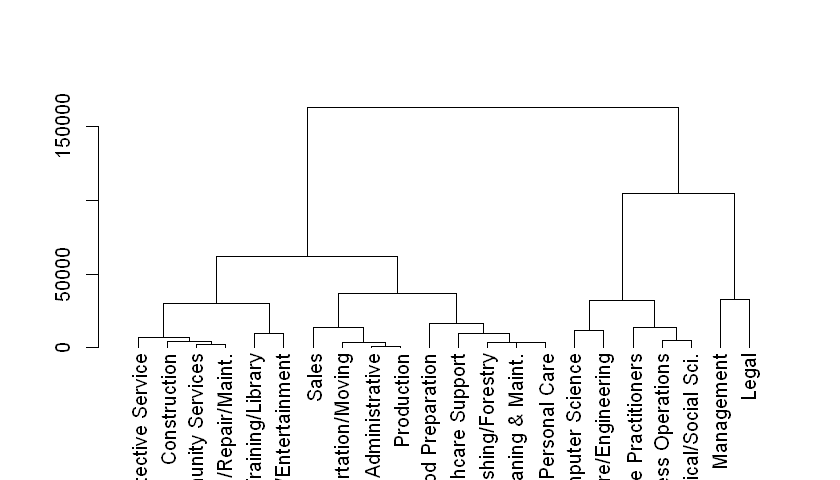

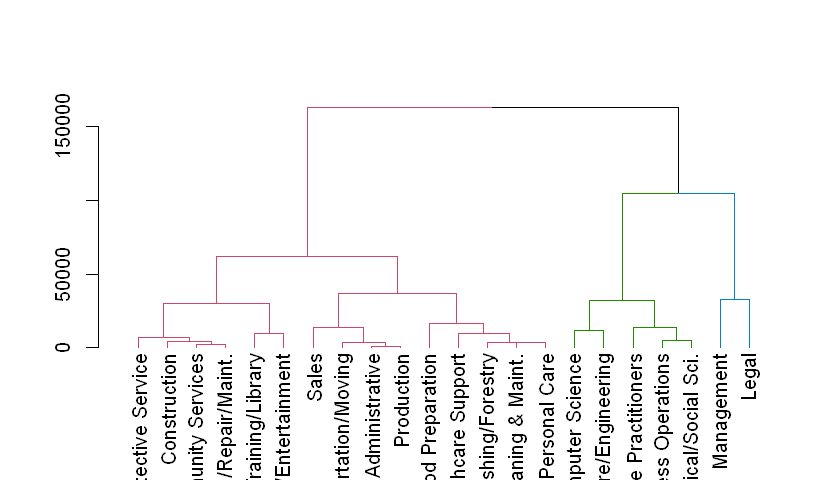

In [21]:
#we need our data sources and our libraries to use color_branches
library(dendextend)

library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=7, repr.plot.height=4)



# Calculate Euclidean distance between the occupations
dist_oes <- dist(oes, method = 'euclidean')

# Generate an average linkage analysis 
hc_oes <- hclust(dist_oes, method = 'average')

# Create a dendrogram object from the hclust variable
dend_oes <- as.dendrogram(hc_oes)

# Plot the dendrogram
plot(dend_oes)

# Color branches by cluster formed from the cut at a height of 100000
dend_colored <- color_branches(dend_oes, h = 100000)

# Plot the colored dendrogram
plot(dend_colored)




#### 4.1.2) Hierarchical clustering: Preparing for exploration
You have now created a potential clustering for the `oes` data, before you can explore these clusters with ggplot2 you will need to process the oes data matrix into a `tidy` data frame with each occupation assigned its cluster.

**Exercise**

- Create the `df_oes` data frame from the oes data.matrix, making sure to store the `rowname` as a column (use rownames_to_column() from the tibble library)
- Build the cluster assignment vector `cut_oes` using `cutree()` with a h = 100,000
- Append the cluster assignments as a column cluster to the `df_oes` data frame and save the results to a new data frame called `clust_oes`
- Use the `gather()` function from the `tidyr()` library to reshape the data into a format amenable for ggplot2 analysis and save the tidied data frame as `gather_oes`

*Answer*

In [27]:
dist_oes <- dist(oes, method = 'euclidean')
hc_oes <- hclust(dist_oes, method = 'average')

library(tibble)
library(tidyr)

# Use rownames_to_column to move the rownames into a column of the data frame
df_oes <- rownames_to_column(as.data.frame(oes), var = 'occupation')
head(df_oes)

# Create a cluster assignment vector at h = 100,000
cut_oes <- cutree(hc_oes, h = 100000)

# Generate the segmented the oes data frame
clust_oes <- mutate(df_oes, cluster = cut_oes)

# Create a tidy data frame by gathering the year and values into two columns
gathered_oes <- gather(data = clust_oes, 
                       key = year, 
                       value = mean_salary, 
                       -occupation, -cluster)
head(gathered_oes)

Warning message:
"package 'tibble' was built under R version 3.5.3"

occupation,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070
Computer Science,60350,61630,64150,66370,67100,69240,72190,74500,77230,78730,80180,82010,83970,86170,87880
Architecture/Engineering,56330,58020,60390,63060,63910,66190,68880,71430,75550,77120,79000,80100,81520,82980,84300
Life/Physical/Social Sci.,49710,52380,54930,57550,58030,59660,62020,64280,66390,67470,68360,69400,70070,71220,72930
Community Services,34190,34630,35800,37050,37530,39000,40540,41790,43180,43830,44240,44710,45310,46160,47200


occupation,cluster,year,mean_salary
Management,1,2001,70800
Business Operations,2,2001,50580
Computer Science,2,2001,60350
Architecture/Engineering,2,2001,56330
Life/Physical/Social Sci.,2,2001,49710
Community Services,3,2001,34190


#### 4.1.3) Hierarchical clustering: Plotting occupational clusters
You have succesfully created all the parts necessary to explore the results of this hierarchical clustering work. In this exercise you will leverage the named assignment vector `cut_oes` and the tidy data frame `gathered_oes` to analyze the resulting clusters.

**Exercise**
- View the assignments of each occupation to their clustering by sorting the cut_oes vector using sort()
- Use ggplot2 to plot each occupation's average income by year and color the lines by the occupation's assigned cluster.

*Answer*

From this work it looks like both Management & Legal professions (cluster 1) experienced the most rapid growth in these 15 years. Let's see what we can get by exploring this data using k-means

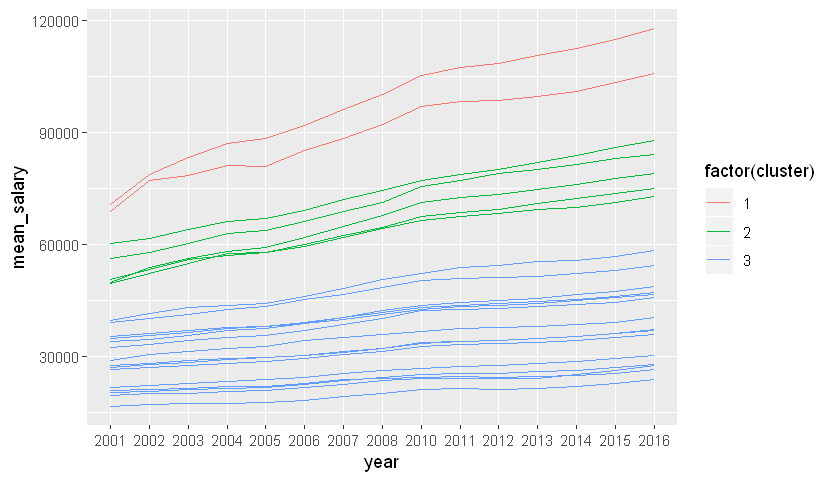

In [57]:
# View the clustering assignments by sorting the cluster assignment vector
#sort(cut_oes)

# Plot the relationship between mean_salary and year and color the lines by the assigned cluster
ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(cluster))) + 
    geom_line(aes(group = occupation))



### 4.2 (video) Reviewing the HC results
great job! you've successfully analyzed the occupation wage data using hierarchical clustering, now let's briefly discuss these results before moving on to kmeans clustering.

Remember that this distance dendogram was constructed using eucleadean distance and the average linkage criteria, what this means is that at height of any given branch, all observations belonging to that branch must have an average euclidean distance amongst each other less than or equal to heigth of that branch 

Rather than using a pre-determined value of k  when cutting the tree, you used the structure of the tree to make the decision.

A height of 100,000 seems reasonable when looking at this structure and generates 3 clustering, however, it would just be reasonable to go heigher to create two clusters or lower to create four, to better understant the consequence of the cut height, you explored the resulting clusters to see if they make sense, more specifically  you plotted the trends of these 3 clusters and used color to compare and constrast them , visually this seems to be reasonable clustering with 3 distinct trends or slops that emerge from  the 3 clusters based on this analysis, one observation we can make is that 2 occupations concurrently had a higher growth in average wages relative to the others these are the management and legal occupations.

Let´s revisit this data through the lens of k-mean clustering 

- evaluate whether pre-processing is necessary.
- after that, the second step will be to empirically estiamte the valu of k using the two methods you have learned about, the elbow plit an the maximum average silhouette width 
- finally, as with any good clustering analysis, you will analyze your resulting clusters and find out what you can lear from them

#### 4.2.1) K-means: Elbow analysis
In the previous exercises you used the dendrogram to propose a clustering that generated 3 trees. In this exercise you will leverage the k-means elbow plot to propose the "best" number of clusters.

**Exercise**
- Use `map_dbl()` to run `kmeans()` using the `oes` data for k values ranging from 1 to 10 and extract the total within-cluster sum of squares value from each model: `model$tot.withinss`
- Store the resulting vector as `tot_withinss`
- Build a new data frame `elbow_df` containing the values of k and the vector of total within-cluster sum of squares
- Use the values in `elbow_df` to plot a line plot showing the relationship between k and total within-cluster sum of squares

*Answer*

So the elbow analysis proposes a different value of k, in the next section let's see what we can learn from Silhouette Width Analysis, k = 2

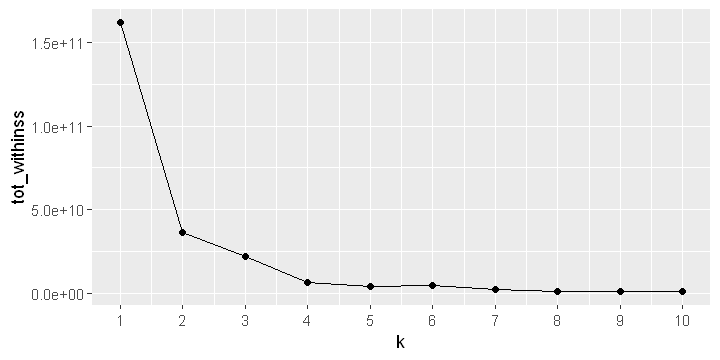

In [18]:
#head(oes)
library(purrr) # to use map_dbl
library(ggplot2)

library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=3)

# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = oes, centers = k)
  model$tot.withinss
})

# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)

# Plot the elbow plot
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line() +
  scale_x_continuous(breaks = 1:10) + geom_point() #the last object is optional

#### 4.2.1) K-means: Average Silhouette Widths
So hierarchical clustering resulting in 3 clusters and the elbow method suggests 2. In this exercise use average silhouette widths to explore what the "best" value of k should be.

**Exercise**
- Use `map_dbl()` to run `pam()` using the `oes` data for `k` values ranging from 2 to 10 and extract the average silhouette width value from each model: `model$silinfo$avg.width` Store the resulting vector as `sil_width`
- Build a new data frame `sil_df` containing the values of k and the vector of average silhouette widths
- Use the values in `sil_df` to plot a line plot showing the relationship between k and average silhouette width

*Answer*

Great work! It seems that this analysis results in another value of k, this time 7 is the top contender (although 2 comes very close).

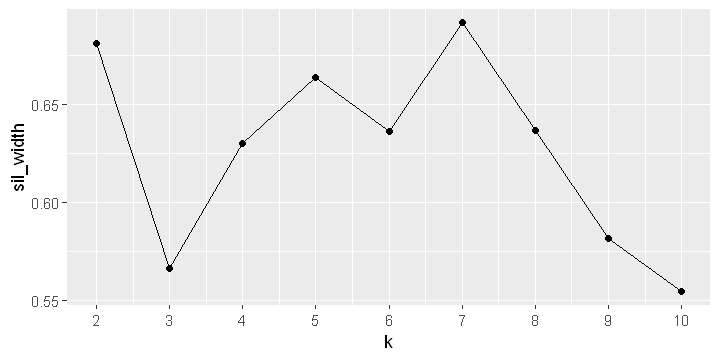

In [26]:
library(purrr) # to use map_dbl
library(cluster) # to use pam functions

# Use map_dbl to run many models with varying value of k
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(oes, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)

# Plot the relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10) + geom_point()

#### 4.2.3) The "best" number of clusters
You ran three different methods for finding the optimal number of clusters and their assignments and you arrived with three different answers.

Below you will find a comparison between the 3 clustering results (via coloring of the occupations based on the clusters to which they belong).

**Exercise**

**What can you say about the "best" way to cluster this data?**

1. The clusters generated by the hierarchical clustering all have members with a Euclidean distance amongst one another less than 100,000 and hence is the best clustering method.
2. The clusters generated using k-means with a k = 2 was identified using elbow analysis and hence is the best way to cluster this data.
3. The clusters generated using k-means with a k = 7 has the largest Average Silhouette Widths among the cluster and hence is the best way to cluster this data.
4. All of the above are correct but the best way to cluster is highly dependent on how you would use this data after.

*Answer*

Number 4 

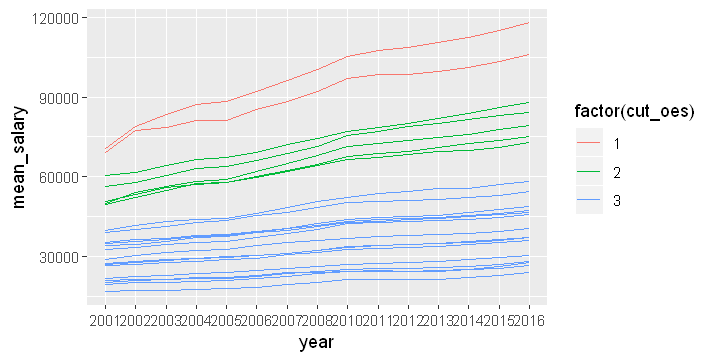

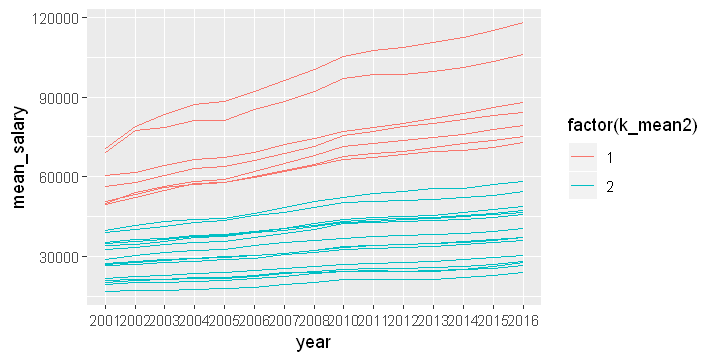

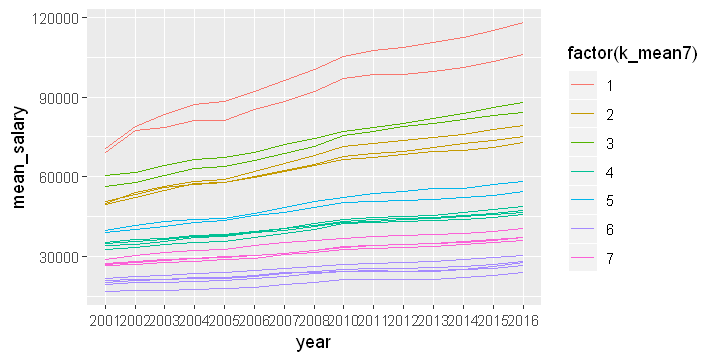

In [51]:
dist_oes <- dist(oes, method = 'euclidean')
hc_oes <- hclust(dist_oes, method = 'average')

library(tibble)
library(tidyr)

# Use rownames_to_column to move the rownames into a column of the data frame
df_oes <- rownames_to_column(as.data.frame(oes), var = 'occupation')

# Create a cluster assignment vector at h = 100,000
cut_oes <- cutree(hc_oes, h = 100000)

#clusteting with k = 2 & 7 
k_mean2<-pam(oes, k = 2) 
k_mean7<-pam(oes, k = 7) 


# Generate the segmented the oes data frame with herarchical, k menas = 2 y 7 clustering
library(dplyr)
clust_oes <- mutate(df_oes, cut_oes = cut_oes , k_mean2 = k_mean2$clustering , k_mean7 = k_mean7$clustering)
#head(clust_oes)

# Create a tidy data frame by gathering the year and values into two columns
gathered_oes <- gather(data = clust_oes, 
                       key = year, 
                       value = mean_salary, 
                       -occupation, -cut_oes, -k_mean2, -k_mean7 )
#head(gathered_oes)


library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=3)

# Plot the relationship between mean_salary and year and color the lines by the assigned cluster
p1<-ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(cut_oes))) + 
    geom_line(aes(group = occupation))

p2<-ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(k_mean2))) + 
    geom_line(aes(group = occupation))

p3<-ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(k_mean7))) + 
    geom_line(aes(group = occupation))

#grid.arrange(p1, p2, p3, nrow=1)
p1
p2
p3

### 4.3 (video) Review K-means results


i don't know about you but the results the last exercise were a little unexpected!, you used 3 approaches for finding clusters and got 3 completely different answers, which of them is the right one? if there is a one point that I want you to remember from this class, is that the anwer is allways it depends? it depends on the clustering setup, it depends on the question we're traying to answer and it depends on ourunderstanding of the data that we´re working with ,to say it another way, clustering methods requere a certain amount of subjectivity, they are the looking glass through which we can see a new perspective on our data, but it us up to us to judiciously use this perspective.

In this case if you would ask for  my opinion?I would say the analysis of the hierarchical based clustering seems to make the most sense here, the 3 distinct clusters of occupations grouped similar slopes of wage growth 
effectively while separating the unique trend that appear

, is this allways the case?, what are the diferences between k-means and hierarchical clustering?, well there are some fundamental differences between thw two.

| Differences              | Hierarchical                | K-Means           |
|--------------------------|-----------------------------|-------------------|
| Distance Used            | virtually any               | euclidean only    |
| **(a)**Results Stable    | Yes                         | No                |
| Evaluating # of clusters | dendogram,silhouette, elbow | silhouette, elbow |
| Computation Complexity   | Relatively Higher           | Relatively Lower  |


a) *kmeans requeries a random step that may yield different results if the process is re-run, this would not occur in hierarchical clustering*

Note: so why would we ever use k-means clustering instead of hierarchical clustering, the main reason is that the k-means algorithm is less computationaly expensive and can be run on much larger data within a reasonable time frame.

Finally these are just some of the tools you may encounter as you delve further into the world of unsupervised clustering,as a bonus, the pam function you used for silhouette analysis actually used the k-mediods method, two other methods you might be interested in are `DBSCAN` and `Optics` clustering.

In [ ]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

**Exercise**

*Answer*